# Problem Statement

## Feature Engineering:

This section deals about feature importances for a given dataset. The given data set is german-credit data which helps classify whether a given person qualifies as a good credit or a bad credit. This helps the bank minimize and realize the risks involved in credit processing

### Import the dataset and describe it

In [1]:
#import german_credit dataset and the necessary libraries
import pandas as pd
credit_dataset = pd.read_csv("german_credit.csv")
credit_dataset.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [2]:
credit_dataset.columns

Index(['default', 'account_check_status', 'duration_in_month',
       'credit_history', 'purpose', 'credit_amount', 'savings',
       'present_emp_since', 'installment_as_income_perc',
       'personal_status_sex', 'other_debtors', 'present_res_since', 'property',
       'age', 'other_installment_plans', 'housing', 'credits_this_bank', 'job',
       'people_under_maintenance', 'telephone', 'foreign_worker'],
      dtype='object')

In [3]:
#Do a describe of the data and understand the description
credit_dataset.describe()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.300000,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,0.458487,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,0.000000,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,0.000000,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,0.000000,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,1.000000,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,1.000000,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


Check for the correlation of the columns.
Hint: Use corr()

In [4]:
credit_dataset.corr()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance
default,1.000000,0.214927,0.154739,0.072404,0.002967,-0.091127,-0.045732,-0.003015
duration_in_month,0.214927,1.000000,0.624984,0.074749,0.034067,-0.036136,-0.011284,-0.023834
credit_amount,0.154739,0.624984,1.000000,-0.271316,0.028926,0.032716,0.020795,0.017142
installment_as_income_perc,0.072404,0.074749,-0.271316,1.000000,0.049302,0.058266,0.021669,-0.071207
present_res_since,0.002967,0.034067,0.028926,0.049302,1.000000,0.266419,0.089625,0.042643
age,-0.091127,-0.036136,0.032716,0.058266,0.266419,1.000000,0.149254,0.118201
credits_this_bank,-0.045732,-0.011284,0.020795,0.021669,0.089625,0.149254,1.000000,0.109667
people_under_maintenance,-0.003015,-0.023834,0.017142,-0.071207,0.042643,0.118201,0.109667,1.000000


### Prepare the model data by converting non-numeric to dummy

#### Hint: Use get_dummies

In [5]:
X = credit_dataset.drop(['default'], axis=1)
y = credit_dataset['default']

In [6]:
credit_dataset_dummy = pd.get_dummies(X, drop_first=True)
credit_dataset_dummy.head()

,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_< 0 DM,account_check_status_>= 200 DM / salary assignments for at least 1 year,account_check_status_no checking account,...,property_unknown / no property,other_installment_plans_none,other_installment_plans_stores,housing_own,housing_rent,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,"telephone_yes, registered under the customers name",foreign_worker_yes
0,6,1169,4,4,67,2,1,1,0,0,...,0,1,0,1,0,1,0,0,1,1
1,48,5951,2,2,22,1,1,0,0,0,...,0,1,0,1,0,1,0,0,0,1
2,12,2096,2,3,49,1,2,0,0,1,...,0,1,0,1,0,0,0,1,0,1
3,42,7882,2,4,45,1,2,1,0,0,...,0,1,0,0,0,1,0,0,0,1
4,24,4870,3,4,53,2,2,1,0,0,...,1,1,0,0,0,1,0,0,0,1


In [7]:
print('Actual column -', credit_dataset.columns)
print('New with Actual column -', credit_dataset_dummy.columns)

Actual column - Index(['default', 'account_check_status', 'duration_in_month',
       'credit_history', 'purpose', 'credit_amount', 'savings',
       'present_emp_since', 'installment_as_income_perc',
       'personal_status_sex', 'other_debtors', 'present_res_since', 'property',
       'age', 'other_installment_plans', 'housing', 'credits_this_bank', 'job',
       'people_under_maintenance', 'telephone', 'foreign_worker'],
      dtype='object')
New with Actual column - Index(['duration_in_month', 'credit_amount', 'installment_as_income_perc',
       'present_res_since', 'age', 'credits_this_bank',
       'people_under_maintenance', 'account_check_status_< 0 DM',
       'account_check_status_>= 200 DM / salary assignments for at least 1 year',
       'account_check_status_no checking account',
       'credit_history_critical account/ other credits existing (not at this bank)',
       'credit_history_delay in paying off in the past',
       'credit_history_existing credits paid back dul

### Drop the original variables which are converted to dummy

After converting the get_dummies there is no original variables

### Split Train/Test data 70:30 ratio
##### Hint:from sklearn.model_selection import train_test_split

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(credit_dataset_dummy, y, test_size=0.30, random_state=42)

### Build Random Forest Model
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [9]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
            oob_score=False, random_state=9999, verbose=0,
            warm_start=False)

### Calculate Confusion Matrix and Accuracy score
##### Hint: Use confusion_matrix and accuracy_score

In [10]:
pred = model.predict(X_test)

In [11]:
from sklearn import metrics
print('Confusion Matrix')
print(metrics.confusion_matrix(y_test, pred))
print('Accuracy Score')
print(metrics.accuracy_score(y_test, pred))

Confusion Matrix
[[195  14]
 [ 60  31]]
Accuracy Score
0.7533333333333333


### Show the list of the features importance

#### Print or display the list of features in descending orders of importance

In [12]:
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
credit_amount,0.111545
age,0.092336
duration_in_month,0.084513
account_check_status_no checking account,0.052053
installment_as_income_perc,0.041180
present_res_since,0.040654
account_check_status_< 0 DM,0.031850
credit_history_critical account/ other credits existing (not at this bank),0.028343
credits_this_bank,0.022560
purpose_car (new),0.021617


### K-fold cross-validation
#### Check for k=10, 12, 15, 18, 20 and print the the cross validation score
#### Hint: use cross_val_score from model_selection

This questional is optional as instructed in lab hours

In [13]:
from sklearn.model_selection import cross_val_score, KFold
k_folds = [10,12,15,18,20]
results = []
for k in k_folds:
    cv_results = cross_val_score(model, X_train, y_train, cv=k, scoring='accuracy')
    print('K = ', k)
    print('CV Score', cv_results)

K =  10
CV Score [0.73239437 0.75714286 0.71428571 0.75714286 0.77142857 0.81428571
 0.74285714 0.78571429 0.7        0.7826087 ]
K =  12
CV Score [0.74576271 0.74576271 0.6440678  0.74576271 0.72881356 0.77586207
 0.77586207 0.75862069 0.82758621 0.75862069 0.74137931 0.78947368]
K =  15
CV Score [0.72340426 0.78723404 0.74468085 0.65957447 0.76595745 0.72340426
 0.74468085 0.74468085 0.82978723 0.74468085 0.76595745 0.73913043
 0.67391304 0.73913043 0.75555556]
K =  18
CV Score [0.725      0.775      0.75       0.625      0.75       0.76923077
 0.74358974 0.66666667 0.74358974 0.71794872 0.87179487 0.71052632
 0.78947368 0.81578947 0.73684211 0.63157895 0.81578947 0.78947368]
K =  20
CV Score [0.75       0.80555556 0.77777778 0.66666667 0.66666667 0.75
 0.72222222 0.72222222 0.75       0.74285714 0.77142857 0.88235294
 0.76470588 0.70588235 0.88235294 0.67647059 0.73529412 0.64705882
 0.82352941 0.79411765]


## Unsupervised Learning:
## KMeans Clustering

This section deals with clustering process. 

The data set has information about features of silhouette extracted from the images of different cars
Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, 
Saab 9000 and an Opel Manta 400 cars. 
This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.

### Import the libraries and vehicle dataset

Check for NAs, missing values in the dataset

In [14]:
vehicle_df = pd.read_csv('vehicle.csv')
vehicle_df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [15]:
vehicle_df.describe()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
count,846.000000,841.000000,842.000000,840.000000,844.000000,846.000000,845.000000,845.000000,843.000000,846.000000,843.000000,844.000000,844.000000,842.000000,840.000000,845.000000,845.000000,846.000000
mean,93.678487,44.828775,82.110451,168.888095,61.678910,8.567376,168.901775,40.933728,20.582444,147.998818,188.631079,439.494076,174.709716,72.447743,6.364286,12.602367,188.919527,195.632388
std,8.234474,6.152172,15.778292,33.520198,7.891463,4.601217,33.214848,7.816186,2.592933,14.515652,31.411004,176.666903,32.584808,7.486190,4.920649,8.936081,6.155809,7.438797
min,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,147.000000,33.000000,19.000000,137.000000,167.000000,318.000000,149.000000,67.000000,2.000000,5.000000,184.000000,190.250000
50%,93.000000,44.000000,80.000000,167.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,363.500000,173.500000,71.500000,6.000000,11.000000,188.000000,197.000000
75%,100.000000,49.000000,98.000000,195.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,217.000000,587.000000,198.000000,75.000000,9.000000,19.000000,193.000000,201.000000
max,119.000000,59.000000,112.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,41.000000,206.000000,211.000000


In [16]:
vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [17]:
vehicle_df = vehicle_df.dropna()

In [18]:
vehicle_df['class'].unique()

array(['van', 'car', 'bus'], dtype=object)

In [19]:
X = vehicle_df.drop(['class'], axis=1)
y = vehicle_df['class']

### Standardize the data

#### Hint: Use zscore from scipy.stats or StandardScaler

In [20]:
from scipy.stats import zscore
X = X.apply(zscore)

### Create a dummy array called distortion


In [21]:
distortion =[]

### Calculating distortion - C distance
Iterating values of k from 1 to 10 fit K means model Using c distance - Get the measure for Sum of squares error.
#### Here, logically K-Means attempts to minimize distortion defined by the the sum of the squared distances between each observation and its closest centroid.

In [22]:
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial import distance
for k in range(1, 10):
    model = KMeans(n_clusters=k).fit(X)
    distortion.append(sum(np.min(distance.cdist(X, model.cluster_centers_,'euclidean'), axis=1))/(X.shape[0]))

### Plotting Elbow/ Scree Plot
Use Matplotlib to plot the scree plot - Note: Scree plot plots distortion vs the no of clusters

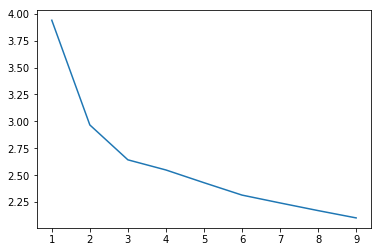

In [23]:
import matplotlib.pylab as plt
%matplotlib inline
plt.plot(range(1,10), distortion)

### Find out the optimal value of K

Optimal K value is 3, Since we have 3 class['van', 'car', 'bus'] in target column which is "class" and also on looking at the elbow graph after 3 it seems like graph becomes stable.

### Using optimal value of K - Cluster the data.
Note: Since the data has more than 2 dimension we cannot visualize the data. As an alternative, we can observe the centroids and note how they are distributed across different dimensions

In [24]:
model = KMeans(n_clusters=3).fit(X)

You can use kmeans.cluster\_centers\_ function to pull the centroid information from the instance

In [25]:
model.cluster_centers_

array([[-0.2319252 , -0.57973847, -0.30724438, -0.02693437,  0.20516443,
        -0.11572895, -0.45873352,  0.32447256, -0.48810058, -0.54152679,
        -0.41282893, -0.46297248, -0.60799507, -0.62342017, -0.06824398,
         0.01513248,  0.82481456,  0.71018194],
       [ 1.13076532,  1.17094237,  1.19500584,  1.01909505,  0.21505188,
         0.34250798,  1.27180461, -1.19061224,  1.27548416,  1.09266768,
         1.22038121,  1.28132727,  1.07954232, -0.02879497,  0.16229031,
         0.26566456, -0.00535553,  0.18380067],
       [-0.91400071, -0.51327609, -0.88664922, -1.05602904, -0.49182906,
        -0.21883169, -0.775563  ,  0.85996991, -0.74203582, -0.47827281,
        -0.77910348, -0.78034412, -0.37943428,  0.82611912, -0.08658373,
        -0.30355495, -1.04650237, -1.10265258]])

### Store the centroids in a dataframe with column names from the original dataset given

Hint: Use pd.Dataframe function 

In [26]:
centroids = pd.DataFrame(model.cluster_centers_, columns=X.columns)
centroids.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,-0.231925,-0.579738,-0.307244,-0.026934,0.205164,-0.115729,-0.458734,0.324473,-0.488101,-0.541527,-0.412829,-0.462972,-0.607995,-0.623420,-0.068244,0.015132,0.824815,0.710182
1,1.130765,1.170942,1.195006,1.019095,0.215052,0.342508,1.271805,-1.190612,1.275484,1.092668,1.220381,1.281327,1.079542,-0.028795,0.162290,0.265665,-0.005356,0.183801
2,-0.914001,-0.513276,-0.886649,-1.056029,-0.491829,-0.218832,-0.775563,0.859970,-0.742036,-0.478273,-0.779103,-0.780344,-0.379434,0.826119,-0.086584,-0.303555,-1.046502,-1.102653


### Use kmeans.labels_ function to print out the labels of the classes

In [27]:
model.labels_

array([0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 2, 2, 0, 0, 1,
       0, 2, 1, 1, 2, 0, 0, 0, 1, 0, 2, 1, 1, 2, 1, 2, 2, 0, 1, 2, 2, 2,
       2, 0, 2, 0, 1, 0, 1, 0, 0, 2, 1, 2, 1, 2, 2, 2, 0, 2, 1, 0, 1, 1,
       0, 2, 0, 1, 0, 2, 2, 1, 0, 2, 0, 1, 0, 2, 0, 2, 1, 0, 1, 0, 2, 1,
       2, 2, 1, 2, 2, 0, 0, 2, 1, 1, 2, 2, 1, 0, 0, 2, 2, 2, 0, 1, 1, 0,
       2, 2, 0, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 2, 1, 1, 2, 0, 2, 0, 0, 1,
       2, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 2, 0, 2, 1, 0, 0, 1, 1,
       0, 1, 2, 2, 1, 1, 0, 1, 0, 0, 0, 0, 2, 1, 2, 0, 2, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 2, 1, 2, 2, 2, 0, 0, 1, 1, 0, 0, 0, 2, 1, 0, 0, 0,
       1, 2, 2, 1, 2, 0, 1, 2, 2, 2, 0, 1, 0, 1, 2, 2, 2, 2, 1, 0, 2, 0,
       1, 2, 0, 0, 2, 1, 2, 2, 0, 0, 1, 2, 1, 2, 0, 0, 1, 0, 0, 1, 1, 2,
       0, 0, 0, 1, 2, 0, 0, 2, 2, 0, 0, 1, 0, 2, 2, 1, 0, 0, 2, 2, 1, 2,
       0, 1, 2, 0, 1, 0, 0, 1, 0, 1, 2, 0, 0, 1, 0, 0, 0, 2, 0, 1, 1, 1,
       1, 2, 0, 1, 2, 2, 2, 0, 2, 1, 1, 2, 1, 0, 2,

In [28]:
vehicle_df['Predicted'] = model.predict(X)

In [29]:
vehicle_df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class,Predicted
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van,0
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van,0
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car,1
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van,0
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus,2


In [30]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
vehicle_df['class_le'] = le.fit_transform(vehicle_df['class'])

In [31]:
vehicle_df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,...,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class,Predicted,class_le
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,...,379.0,184.0,70.0,6.0,16.0,187.0,197,van,0,2
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,...,330.0,158.0,72.0,9.0,14.0,189.0,199,van,0,2
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,...,635.0,220.0,73.0,14.0,9.0,188.0,196,car,1,1
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,...,309.0,127.0,63.0,6.0,10.0,199.0,207,van,0,2
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,...,325.0,188.0,127.0,9.0,11.0,180.0,183,bus,2,0


In [32]:
metrics.confusion_matrix(vehicle_df['class_le'], vehicle_df['Predicted'])

array([[ 78,  44,  83],
       [129, 212,  72],
       [103,   4,  88]], dtype=int64)

In [33]:
metrics.accuracy_score(vehicle_df['class_le'], vehicle_df['Predicted'])

0.46494464944649444